In [71]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sys 
from natsort import natsorted 

In [79]:
dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\Broadband telecom quantum memories\\2023_Pr_YVO_Sectroscopy\\Visible\\0.1%'
folder = '0207_Laser_Scan'
path = dir + '\\' + folder + '\\'
file_list = os.listdir(path)
list_csv=natsorted([i for i in file_list if i.endswith('.CSV')]) # Sort the measured data file

#Scan_offset=['25 V','30 V','40 V']
central_freq=['496.11 THz','496.12188 THz']
HWP=['174$\degree$', '130$\degree$']
ratio=(99.2/0.8)*0.84*0.6886*0.84

0
0.9140990227112
1
0.2177695482678


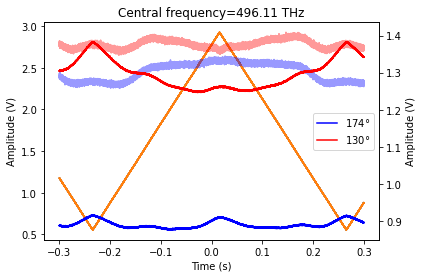

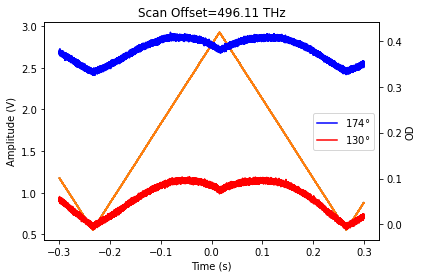

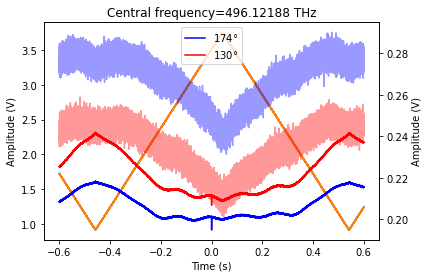

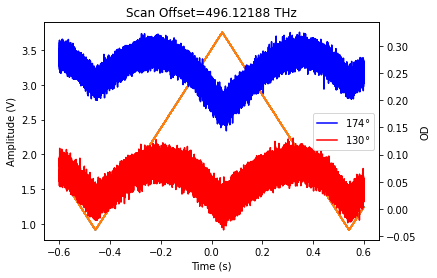

In [83]:
min_data_1=np.empty(int(len(list_csv)/2))
min_data_1_pos=np.empty(int(len(list_csv)/2))
max_data_1=np.empty(int(len(list_csv)/2))
max_data_1_pos=np.empty(int(len(list_csv)/2))
min_data_2=np.empty(int(len(list_csv)/2))
min_data_2_pos=np.empty(int(len(list_csv)/2))
max_data_2=np.empty(int(len(list_csv)/2))
max_data_2_pos=np.empty(int(len(list_csv)/2))

for index in range(int(len(list_csv)/2)):

    print(index)
    raw_data_1=pd.read_csv(os.path.join(path,list_csv[2*index]))
    raw_data_1=raw_data_1.to_numpy()

    min_data_1[index]=min(raw_data_1[:,1])
    Find_pos_1=np.where(raw_data_1[:,1]==min_data_1[index])
    min_data_1_pos[index]=Find_pos_1[0]
    max_data_1[index]=max(raw_data_1[:,1])
    Find_pos_1=np.where(raw_data_1[:,1]==max_data_1[index])
    max_data_1_pos[index]=Find_pos_1[0]
    print(raw_data_1[int(min_data_1_pos[index]),2])
    ratio_1=raw_data_1[int(min_data_1_pos[index]),2]/raw_data_1[int(min_data_1_pos[index]),3]
    

    raw_data_2=pd.read_csv(os.path.join(path,list_csv[2*index+1]))
    raw_data_2=raw_data_2.to_numpy()
    min_data_2[index]=min(raw_data_2[:,1])
    Find_pos_2=np.where(raw_data_2[:,1]==min_data_2[index])
    min_data_2_pos[index]=Find_pos_2[0]
    max_data_2[index]=max(raw_data_2[:,1])
    Find_pos_2=np.where(raw_data_2[:,1]==max_data_2[index])
    max_data_2_pos[index]=Find_pos_2[0]
    ratio_2=raw_data_2[int(min_data_2_pos[index]),2]/raw_data_2[int(min_data_2_pos[index]),3]
    
    OD_1=np.log(raw_data_1[:,3]*ratio_2/raw_data_1[:,2])
    OD_2=np.log(raw_data_2[:,3]*ratio_2/raw_data_2[:,2])

    fig,ax=plt.subplots()
    ax1=ax.twinx()
    ax.plot(raw_data_1[:,0],raw_data_1[:,1])
    ax.plot(raw_data_2[:,0],raw_data_2[:,1])

    ax1.plot(raw_data_1[:,0],raw_data_1[:,2],'b',label="{}".format(HWP[0]))
    ax1.plot(raw_data_1[:,0],raw_data_1[:,3]*ratio_2,'b',alpha=0.4)
    ax1.plot(raw_data_2[:,0],raw_data_2[:,2],'r',label="{}".format(HWP[1]))
    ax1.plot(raw_data_2[:,0],raw_data_2[:,3]*ratio_2,'r',alpha=0.4)
    ax.set_title('Central frequency='+"{}".format(central_freq[index]))
    ax1.legend()
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (V)')
    ax1.set_ylabel('Amplitude (V)')

    fig.patch.set_facecolor('white')

    fig,ax=plt.subplots()
    ax1=ax.twinx()
    ax.plot(raw_data_1[:,0],raw_data_1[:,1])
    ax.plot(raw_data_2[:,0],raw_data_2[:,1])
    ax1.plot(raw_data_1[:,0],OD_1,'b',label="{}".format(HWP[0]))
    ax1.plot(raw_data_2[:,0],OD_2,'r',label="{}".format(HWP[1]))
    ax.set_title('Scan Offset='+"{}".format(central_freq[index]))
    ax1.legend()
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (V)')
    ax1.set_ylabel('OD')
